# Multiple Linear Regression with Dummies - Exercise

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size_year_view.csv'. 

You are expected to create a multiple linear regression (similar to the one in the lecture), using the new data. 

In this exercise, the dependent variable is 'price', while the independent variables are 'size', 'year', and 'view'.

#### Regarding the 'view' variable:
There are two options: 'Sea view' and 'No sea view'. You are expected to create a dummy variable for view and include it in the regression

Good luck!

## Import the relevant libraries

In [28]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

In [9]:
df = pd.read_csv('real_estate_price_size_year_view.csv')
df

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view
...,...,...,...,...
95,252460.400,549.80,2009,Sea view
96,310522.592,1037.44,2009,No sea view
97,383635.568,1504.75,2006,No sea view
98,225145.248,648.29,2015,No sea view


In [8]:
df.describe()

,price,size,year,view
count,100.000000,100.000000,100.000000,0.0
mean,292289.470160,853.024200,2012.600000,NaN
std,77051.727525,297.941951,4.729021,NaN
min,154282.128000,479.750000,2006.000000,NaN
25%,234280.148000,643.330000,2009.000000,NaN
50%,280590.716000,696.405000,2015.000000,NaN
75%,335723.696000,1029.322500,2018.000000,NaN
max,500681.128000,1842.510000,2018.000000,NaN


## Create a dummy variable for 'view'

In [4]:
df['view'].value_counts() # 0 = no view, 1 = view


view
No sea view    51
Sea view       49
Name: count, dtype: int64

In [10]:
df['view'] = df['view'].map({'No sea view': 0, 'Sea view' : 1})
df

,price,size,year,view
0,234314.144,643.09,2015,0
1,228581.528,656.22,2009,0
2,281626.336,487.29,2018,1
3,401255.608,1504.75,2015,0
4,458674.256,1275.46,2009,1
...,...,...,...,...
95,252460.400,549.80,2009,1
96,310522.592,1037.44,2009,0
97,383635.568,1504.75,2006,0
98,225145.248,648.29,2015,0


## Create the regression

### Declare the dependent and the independent variables

In [12]:
y = df['price']
x1 = df[['size', 'year', 'view']]


### Regression

In [26]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     335.2
Date:                Sun, 09 Apr 2023   Prob (F-statistic):           1.02e-50
Time:                        19:00:19   Log-Likelihood:                -1144.6
No. Observations:                 100   AIC:                             2297.
Df Residuals:                      96   BIC:                             2308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.398e+06   9.94e+05     -5.431      0.000   -7.37e+06   -3.43e+06
size         223.0316      7.838     28.455      0.000     207.473     238.590
year        2718.9489    493.502      5.510      0.000    1739.356    3698.542
view        5.673e+04   4627.695     12.258      0.000    4.75e+04    6.59e+04
==============================================================================
Omnibus:                       29.224   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.957
Skew:                           1.088   Prob(JB):                     7.85e-15
Kurtosis:                       6.295   Cond. No.                     9.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Plot

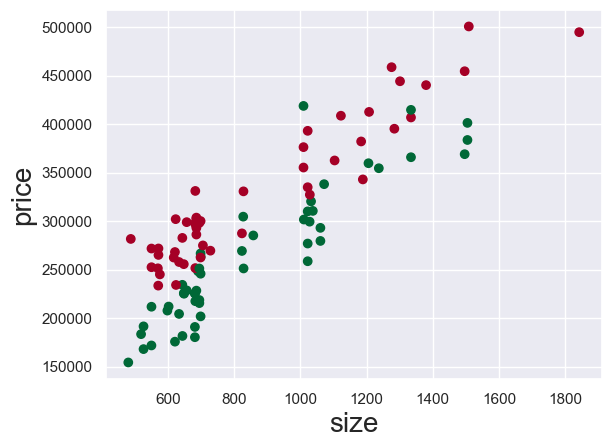

In [41]:
plt.scatter(df['size'], df['price'], c=df['view'], cmap='RdYlGn_r')
yhat_no_view = -5.398e+06 + 223.0316 * df['size']
yhat_view = -5.398e+06 + 223.0316 * df['size'] + 5.673e+04
# fig = plt.plot(df['size'], yhat_no_view, lw=2, c='orange')
# fig = plt.plot(df['size'], yhat_view, lw=2, c='green')
plt.xlabel('size', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.show()

In [42]:
x

,const,size,year,view
0,1.0,643.09,2015,0
1,1.0,656.22,2009,0
2,1.0,487.29,2018,1
3,1.0,1504.75,2015,0
4,1.0,1275.46,2009,1
...,...,...,...,...
95,1.0,549.80,2009,1
96,1.0,1037.44,2009,0
97,1.0,1504.75,2006,0
98,1.0,648.29,2015,0
